In [34]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random as random
from calibration_util import *
%matplotlib inline
%precision %.4f
import warnings
warnings.filterwarnings('ignore')

## Generate some data, introduce varying amounts of error ##


In [45]:
data = generate(1000,5,0.2,99)

In [46]:
data.head()

,x0,x1,x2,x3,x4,y,g
341,-1.897510,-1.926044,-1.511468,-2.280682,-0.545986,0.000000,1.0
957,-1.093064,-0.590733,-2.509643,-0.140688,-1.877154,0.107379,0.0
382,-1.787527,-2.023447,-2.398719,1.825149,-0.885930,0.113730,1.0
822,-0.704922,-1.604984,-1.903589,-1.496792,0.008797,0.120433,0.0
915,-0.277001,-0.802967,-1.862609,-1.642133,-1.321887,0.127985,0.0


In [51]:
df = data[['y','g']]
df['y_pred_90'] =add_error(df, 0.9, 0.)['y']
df['y_pred_75'] =add_error(df, 0.75, 0.)['y']
df['y_pred_50'] =add_error(df, 0.5, 0.)['y']
df['y_pred_25'] =add_error(df, 0.25, 0.)['y']
df['y_pred_10'] =add_error(df, 0.1, 0.)['y']
df.head()

,y,g,y_pred_90,y_pred_75,y_pred_50,y_pred_25,y_pred_10
341,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
957,0.107379,0.0,0.110071,0.086163,0.117561,0.043694,0.049701
382,0.113730,1.0,0.116168,0.103949,0.106529,0.122261,0.110345
822,0.120433,0.0,0.126009,0.107635,0.097605,0.107976,0.019631
915,0.127985,0.0,0.129871,0.137360,0.112789,0.136176,0.107758


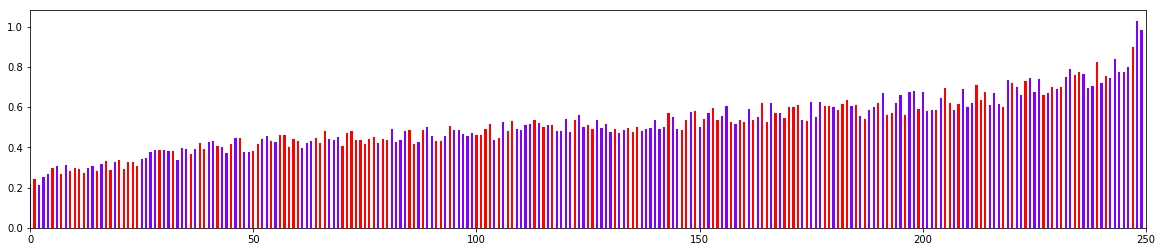

In [61]:
# 10% of group 1 undervalued 
plot_rank(df.sample(frac=0.25).sort_values('y'),'y_pred_90')

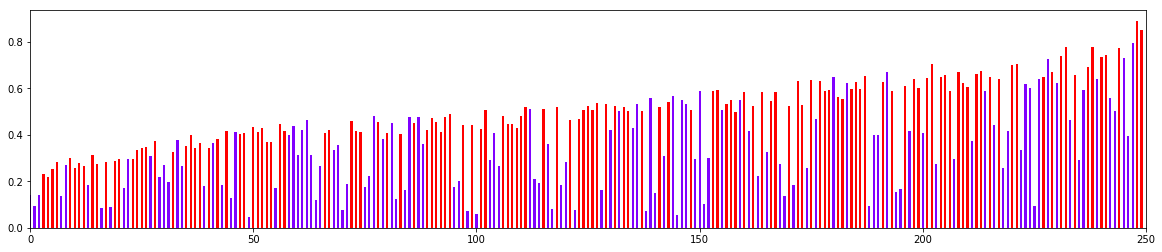

In [62]:
# 90% of group 1 undervalued 
plot_rank(df.sample(frac=0.25).sort_values('y'),'y_pred_10')

## Plot different types of error for each synthetic example ##

y_pred_90


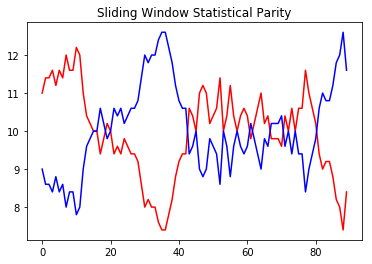

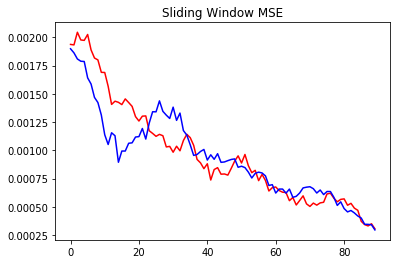

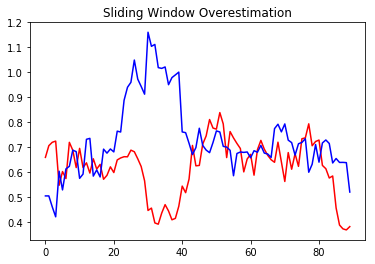

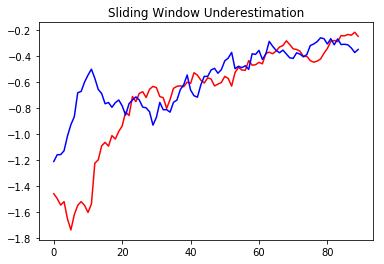

y_pred_75


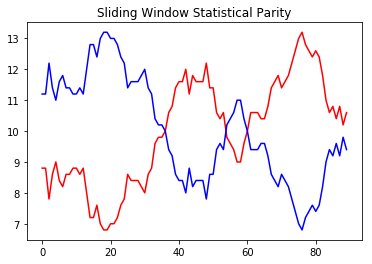

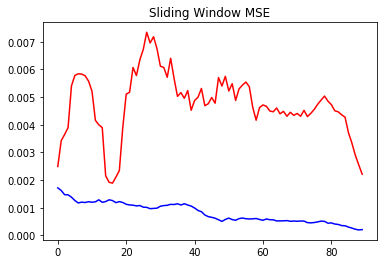

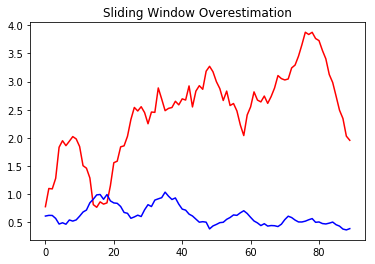

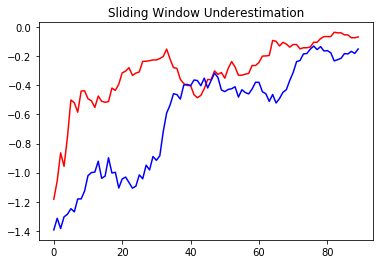

y_pred_50


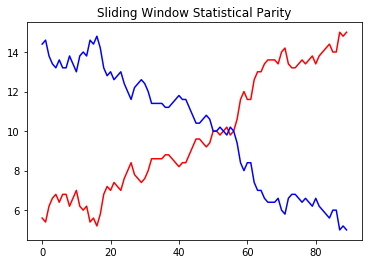

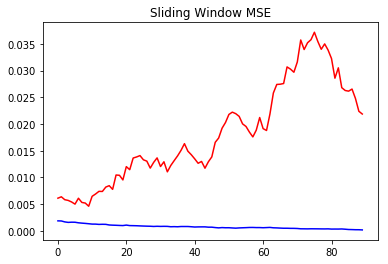

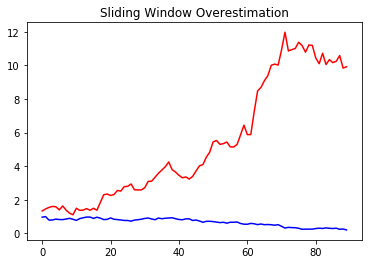

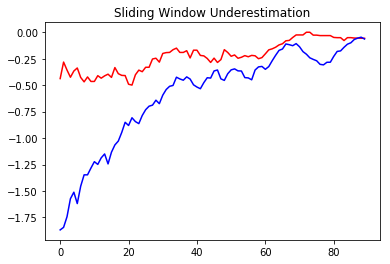

y_pred_25


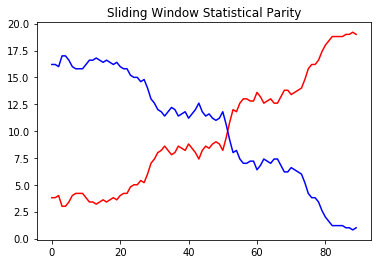

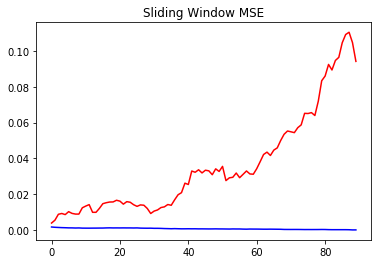

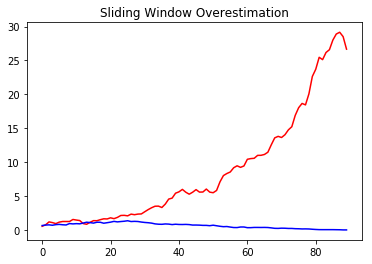

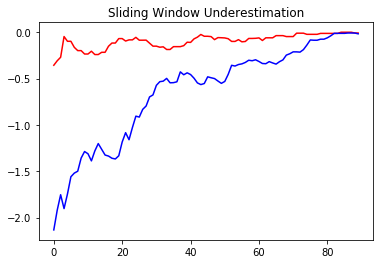

y_pred_10


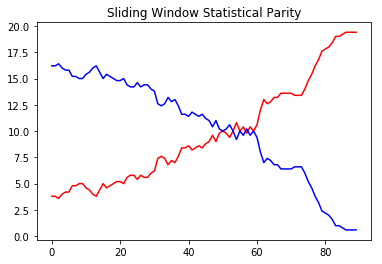

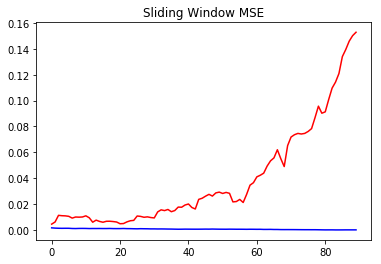

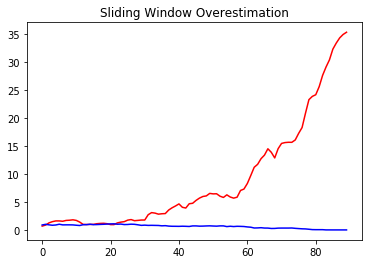

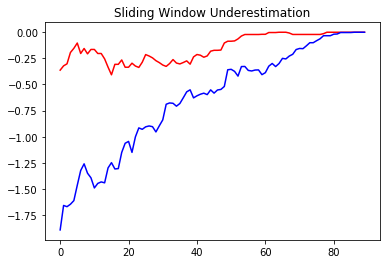

In [55]:
for c in df.drop(['y','g'], axis=1).columns.values:
    print(c)
    tmp = df[['y','g']]
    tmp['y_pred']=df[c]
    plot_errs(tmp, 100, 10)

## Measure the error using different correlation and distance measures ##

In [63]:
# since the error is always 0 for one group, kl-doesn't work
print("KL-divergence")
for c in df.drop(['y','g'], axis=1).columns.values:
    tmp = df[['y','g']]
    tmp['y_pred']=df[c]
    print(c+" Statistical Parity: ", get_kl_err(tmp, sliding_prob, window=100, step=10))
print("\n")
for c in df.drop(['y','g'], axis=1).columns.values:
    tmp = df[['y','g']]
    tmp['y_pred']=df[c]
    print(c+" Calibration: ", get_kl_err(tmp, sliding_mse, window=100, step=10))
print("\n")
for c in df.drop(['y','g'], axis=1).columns.values:
    tmp = df[['y','g']]
    tmp['y_pred']=df[c]
    print(c+" Equalized Odds", get_kl_err(tmp, sliding_oe, window=100, step=10), get_kl_err(tmp, sliding_ue, window=100, step=10))
print("\n")
print("Spearman")
for c in df.drop(['y','g'], axis=1).columns.values:
    tmp = df[['y','g']]
    tmp['y_pred']=df[c]
    print(c+" Statistical Parity: ", get_spear_err(tmp, sliding_prob, window=100, step=10))
print("\n")
for c in df.drop(['y','g'], axis=1).columns.values:
    tmp = df[['y','g']]
    tmp['y_pred']=df[c]
    print(c+" Calibration: ", get_spear_err(tmp, sliding_mse, window=100, step=10))
print("\n")
for c in df.drop(['y','g'], axis=1).columns.values:
    tmp = df[['y','g']]
    tmp['y_pred']=df[c]
    print(c+" Equalized Odds", get_spear_err(tmp, sliding_oe, window=100, step=10), get_spear_err(tmp, sliding_ue, window=100, step=10))
print("\n")
print("Kendall")
for c in df.drop(['y','g'], axis=1).columns.values:
    tmp = df[['y','g']]
    tmp['y_pred']=df[c]
    print(c+" Statistical Parity: ", get_kendall_err(tmp, sliding_prob, window=100, step=10))
print("\n")
for c in df.drop(['y','g'], axis=1).columns.values:
    tmp = df[['y','g']]
    tmp['y_pred']=df[c]
    print(c+" Calibration: ", get_kendall_err(tmp, sliding_mse, window=100, step=10))
print("\n")
for c in df.drop(['y','g'], axis=1).columns.values:
    tmp = df[['y','g']]
    tmp['y_pred']=df[c]
    print(c+" Equalized Odds", get_kendall_err(tmp, sliding_oe, window=100, step=10), get_spear_err(tmp, sliding_ue, window=100, step=10))

KL-divergence
y_pred_90 Statistical Parity:  0.0264132024226
y_pred_75 Statistical Parity:  0.0592058172849
y_pred_50 Statistical Parity:  0.191770401025
y_pred_25 Statistical Parity:  0.755266292693
y_pred_10 Statistical Parity:  0.735543089564


y_pred_90 Calibration:  0.0167301766384
y_pred_75 Calibration:  0.117921560304
y_pred_50 Calibration:  0.50094989158
y_pred_25 Calibration:  1.05244273407
y_pred_10 Calibration:  1.47523848402


y_pred_90 Equalized Odds 0.0491745359447 0.0640620866231
y_pred_75 Equalized Odds 0.129491515505 0.108002770049
y_pred_50 Equalized Odds 0.576364175375 0.0863956656386
y_pred_25 Equalized Odds 1.78047218088 0.143588129447
y_pred_10 Equalized Odds 1.89587374481 0.153052154827


Spearman
y_pred_90 Statistical Parity:  -1.01123595506
y_pred_75 Statistical Parity:  -1.01123595506
y_pred_50 Statistical Parity:  -1.01123595506
y_pred_25 Statistical Parity:  -1.01123595506
y_pred_10 Statistical Parity:  -1.01123595506


y_pred_90 Calibration:  0.916042524822

In [49]:
def se(y_pred, y):
    diffs = np.subtract(y_pred, y)
    return np.sum(np.square(diffs))

#overestimate
def oe(y_pred, y):
    diffs = y_pred - y
    return [x if x > 0 else 0 for x in diffs]

#underestimate
def ue(y_pred, y):
    diffs = y_pred - y
    return [abs(x) if x < 0 else 0 for x in diffs]



## Plot the binned predictions to illustrate distibution of error accross ranking ## 

In [81]:
def add_more_error(data, scale1, scale2):
    data2 = data.copy()
    for i in range(len(data)):
        if(data2.iloc[i]['g'] == 0.):
            data2.iloc[i]['y'] = data2.iloc[i]['y']*(random.uniform(scale1, 1.1))
        else:
            data2.iloc[i]['y'] = data2.iloc[i]['y']*(random.uniform(0.9, 1+scale2))
    data2.sort_values('y', inplace=True)
    return data2

In [83]:
df2 = df[['y','g']]
df2['y_pred']=add_more_error(df, 0.3, 0.3)['y']

Bin all points. Plot predicted vs true for each group


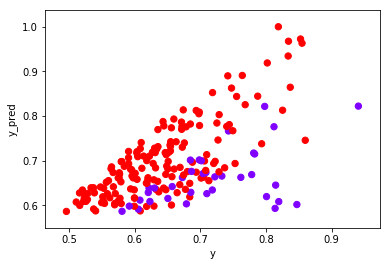

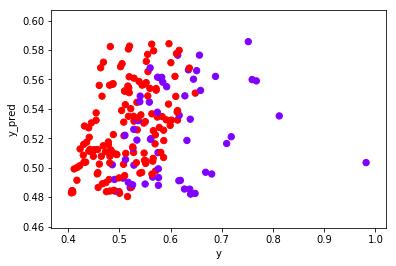

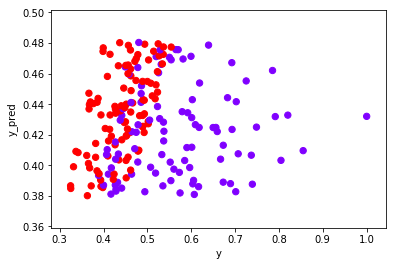

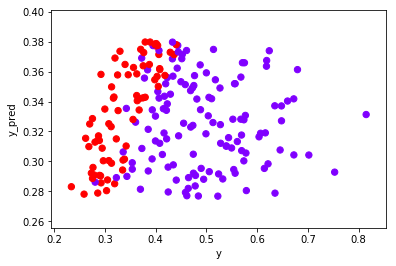

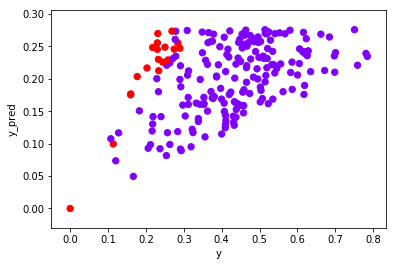

In [91]:
#By plotting the data we can see that the low spearman values are due to the fact that only some of the data is undervalued.
#If the data for one group was consistently penalized, then the spearman scores would actually be perfect I think

# Just because the predicted scores are lower, if the with-in group ordering is consistent, the nboth ranks will 
# increase monotonicly
plt.rcParams['figure.figsize'] = (6, 4)
kf = KFold(n_splits=5, shuffle=False, random_state=1)

print("Bin all points. Plot predicted vs true for each group")

bins = []
for rest, bin in kf.split(df2):
    bins.append(bin)
bins.reverse()
for bin in bins:
    points = df2.sort_values('y_pred')
    scale(points, 'y_pred')
    vals = points.iloc[bin]
#     vals0 = points.iloc[bin][points["g"]==0.]
#     vals0.plot.scatter("y", "y_pred", color='red')
#     vals1 = points.iloc[bin][points["g"]==1.]
#     vals1.plot.scatter("y", "y_pred", color='purple')
    cmap = plt.cm.rainbow
    vals.plot.scatter('y', 'y_pred', s=40, color=cmap((vals['g'])))#, ylim = [0,1], xlim = [0,1]))
    
#     ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');
#     df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);
    